# Лабораторная работа №4.

Выполнил студент группы 12002209 Телятников Максим Евгеньевич

# Анализ данных пассажиров "Титаника"


Гибель Титаника – одно из самых печально известных кораблекрушений в истории.

15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул после столкновения с айсбергом.
К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.

Используя набор данных titanic.csv выполните следующие 10 заданий.

In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic.csv', index_col='PassengerId')

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId"

In [11]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')

2. Просмотрите первые 6 строк

In [10]:
first_6_rows = df.head(6)

first_6_rows.to_excel('first_6_rows.xlsx', sheet_name='First 6 Rows')

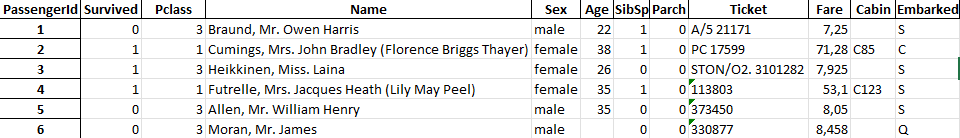

3. Выведите описание данных

In [14]:
description = df.describe()
description.to_excel("data_description.xlsx")

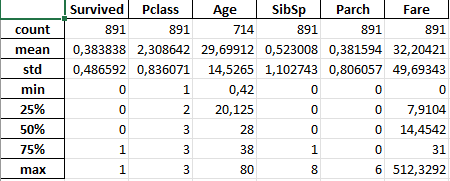

4. Сколько мужчин / женщин находилось на борту?

In [15]:
sex_counts = df['Sex'].value_counts()

print("Количество мужчин и женщин на борту:")
print(sex_counts)

Количество мужчин и женщин на борту:
Sex
male      577
female    314
Name: count, dtype: int64


4. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса

In [16]:
pclass_distribution = df['Pclass'].value_counts().sort_index()
print("Распределение Pclass (общее):")
print(pclass_distribution)

pclass_by_sex = df.groupby('Sex')['Pclass'].value_counts().unstack()
print("\nРаспределение Pclass по полу:")
print(pclass_by_sex)

men_2nd_class = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)].shape[0]
print(f"\nКоличество мужчин 2-го класса: {men_2nd_class}")

Распределение Pclass (общее):
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Распределение Pclass по полу:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347

Количество мужчин 2-го класса: 108


5. Каковы медиана и среднеквадрати́чное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [17]:
median_fare = df['Fare'].median()

std_fare = df['Fare'].std()

median_fare_rounded = round(median_fare, 2)
std_fare_rounded = round(std_fare, 2)

print(f"Медиана платежей (Fare): {median_fare_rounded}")
print(f"Среднеквадратичное отклонение платежей (Fare): {std_fare_rounded}")

Медиана платежей (Fare): 14.45
Среднеквадратичное отклонение платежей (Fare): 49.69


6. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [18]:
young_group = df[df['Age'] < 30]

old_group = df[df['Age'] > 60]

young_survival_rate = young_group['Survived'].mean()

old_survival_rate = old_group['Survived'].mean()

print(f"Доля выживших среди людей моложе 30 лет: {round(young_survival_rate * 100, 2)}%")
print(f"Доля выживших среди людей старше 60 лет: {round(old_survival_rate * 100, 2)}%")

if young_survival_rate > old_survival_rate:
    print("\nЛюди моложе 30 лет выживали чаще, чем люди старше 60 лет.")
else:
    print("\nЛюди моложе 30 лет выживали реже или так же часто, как люди старше 60 лет.")

Доля выживших среди людей моложе 30 лет: 40.62%
Доля выживших среди людей старше 60 лет: 22.73%

Люди моложе 30 лет выживали чаще, чем люди старше 60 лет.


7. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [19]:
women_group = df[df['Sex'] == 'female']

men_group = df[df['Sex'] == 'male']

women_survival_rate = women_group['Survived'].mean()

men_survival_rate = men_group['Survived'].mean()

print(f"Доля выживших среди женщин: {round(women_survival_rate * 100, 2)}%")
print(f"Доля выживших среди мужчин: {round(men_survival_rate * 100, 2)}%")

if women_survival_rate > men_survival_rate:
    print("\nЖенщины выживали чаще, чем мужчины.")
else:
    print("\nЖенщины выживали реже или так же часто, как мужчины.")

Доля выживших среди женщин: 74.2%
Доля выживших среди мужчин: 18.89%

Женщины выживали чаще, чем мужчины.


8.  Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [20]:
men_df = df[df['Sex'] == 'male']

names = men_df['Name']

def extract_first_name(name):

    return name.split(', ')[1].split(' ')[1] if len(name.split(', ')) > 1 else name

first_names = names.apply(extract_first_name)

most_common_name = first_names.mode()[0]

print(f"Самое популярное имя среди мужчин: {most_common_name}")

Самое популярное имя среди мужчин: William




9. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

    В среднем мужчины 1-го класса старше 40 лет
    В среднем женщины 1-го класса старше 40 лет
    Мужчины всех классов в среднем старше женщин того же класса
    В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса



In [21]:
age_by_sex_and_class = df.groupby(['Sex', 'Pclass'])['Age'].mean().unstack()

print("Средний возраст мужчин и женщин по классам обслуживания:")
print(age_by_sex_and_class)

print("\nПроверка утверждений:")

men_1st_class_avg_age = age_by_sex_and_class.loc['male', 1]
print(f"1. Мужчины 1-го класса в среднем старше 40 лет: {men_1st_class_avg_age > 40}")

women_1st_class_avg_age = age_by_sex_and_class.loc['female', 1]
print(f"2. Женщины 1-го класса в среднем старше 40 лет: {women_1st_class_avg_age > 40}")

men_older_than_women = (age_by_sex_and_class.loc['male'] > age_by_sex_and_class.loc['female']).all()
print(f"3. Мужчины всех классов в среднем старше женщин того же класса: {men_older_than_women}")

class_age_order = (age_by_sex_and_class.mean(axis=0).sort_values(ascending=False).index == [1, 2, 3]).all()
print(f"4. Люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса: {class_age_order}")

Средний возраст мужчин и женщин по классам обслуживания:
Pclass          1          2          3
Sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589

Проверка утверждений:
1. Мужчины 1-го класса в среднем старше 40 лет: True
2. Женщины 1-го класса в среднем старше 40 лет: False
3. Мужчины всех классов в среднем старше женщин того же класса: True
4. Люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса: True


10. Сравните возраст у спасенных и у погибших пасажиров. Средний возраст погибших выше, верно?

In [22]:
survived_group = df[df['Survived'] == 1]
not_survived_group = df[df['Survived'] == 0]

average_age_survived = survived_group['Age'].mean()
average_age_not_survived = not_survived_group['Age'].mean()

print(f"Средний возраст спасенных: {round(average_age_survived, 2)}")
print(f"Средний возраст погибших: {round(average_age_not_survived, 2)}")

if average_age_not_survived > average_age_survived:
    print("\nСредний возраст погибших выше, чем спасенных: Утверждение верно.")
else:
    print("\nСредний возраст погибших не выше, чем спасенных: Утверждение неверно.")

Средний возраст спасенных: 28.34
Средний возраст погибших: 30.63

Средний возраст погибших выше, чем спасенных: Утверждение верно.


### Дополнительные вопросы для защиты

1. Что такое медиана? Рассчитать медиану для предложенного ряда чисел.

Медиана — это значение, которое делит упорядоченный набор данных на две равные части. Если количество элементов нечетное, медиана — это средний элемент. Если четное — среднее арифметическое двух центральных элементов.

```
data = [1, 3, 5, 7, 9]
median = pd.Series(data).median()
print(f"Медиана: {median}")
```

2. Что такое дисперсия? Рассчитать дисперсию для предложенного ряда чисел.

Дисперсия — это мера разброса данных, которая показывает, насколько значения отклоняются от среднего.
```
data = [1, 3, 5, 7, 9]
variance = pd.Series(data).var()
print(f"Дисперсия: {variance}")
```

3. Что такое среднеквадратичное отклонение? Рассчитать среднеквадратичное отклонение для предложенного ряда чисел.

Среднеквадратичное отклонение (стандартное отклонение) — это квадратный корень из дисперсии. Оно показывает, насколько данные отклоняются от среднего.

```
data = [1, 3, 5, 7, 9]
std_dev = pd.Series(data).std()
print(f"Среднеквадратичное отклонение: {std_dev}")
```

4. Что такое Series и чем он отличается от DataFrame

Series — это одномерный массив с метками (индексами). Он похож на столбец в таблице.

DataFrame — это двумерная таблица, состоящая из нескольких столбцов (Series).

Различия:

- Series — одномерный объект, DataFrame — двумерный.

- Series имеет один индекс, DataFrame — два (индекс строк и столбцов).

5. Можно ли изменить индекс в Series после создания объекта?

Да, можно изменить индекс с помощью атрибута .index

6. Можно ли выполнить операцию сложения над двумя объектами Series, если они имеют:
- одинаковые типы данных, одинаковые размеры и одинаковые индексы? **Ответ**: Сложение выполнится поэлементно.
- одинаковые типы данных, одинаковые размеры, но разные индексы? **Ответ**: Сложение выполнится, но значения с несовпадающими индексами будут NaN
- одинаковые типы данных, разные размеры и одинаковые индексы? **Ответ**: Сложение выполнится, но значения с отсутствующими индексами будут NaN
- разные типы данных, одинаковые размеры и одинаковые индексы? **Ответ**: Ошибка, если типы данных несовместимы (например, числа и строки)
- разные типы данных, одинаковые размеры и разные индексы? **Ответ**: Ошибка, если типы данных несовместимы
- разные типы данных, разные размеры и разные индексы? **Ответ**: Ошибка, если типы данных несовместимы
7. Что такое DataFrame и чем он отличается от Series

DataFrame — это двумерная таблица, состоящая из строк и столбцов. Каждый столбец — это объект Series.

Различия:

- Series — одномерный объект, DataFrame — двумерный.

- DataFrame может содержать несколько Series.

8. Что необходимо сделать, чтобы число строк в DateFrame при его просмотре, по умолчанию составляло 8?

Использовать метод pd.set_option
```
pd.set_option('display.max_rows', 8)
df = pd.DataFrame({'A': range(10)})
print(df)
```

9. Чем отличается метод iloc от метода loс

iloc — используется для доступа к данным по числовым индексам (позициям).

loc — используется для доступа к данным по меткам (индексам).

10. Можно ли добавить в DateFrame дополнительный Series?

Да, можно добавить Series как новый столбец


```
df = pd.DataFrame({'A': [1, 2, 3]})
s = pd.Series([4, 5, 6])
df['B'] = s
```

11. Требуются ли установка дополнительных библиотек для загрузки с помощью pandas файлов в формате CSV? Excel (.xls)? Json?

CSV: Нет, Pandas поддерживает CSV из коробки.

Excel: Да, требуется библиотека openpyxl или xlrd.

JSON: Нет, Pandas поддерживает JSON из коробки.